## **SOFTMAX REGRESSION OR MULTINOMIAL REGRESSION**

It is needed for the multiclass classification. 

### **WHAT IS SOFTMAX FUNCTION?**

$$
\displaystyle \sigma(\vec{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}
$$


Here,\
k &rarr; no of classes
$$
\sigma(z)_1=\frac{e^{z_1}}{e_{z_1}+e^{z_2}+e^{z_3}}\\
\sigma(z)_2=\frac{e^{z_2}}{e_{z_1}+e^{z_2}+e^{z_3}}\\
\sigma(z)_3=\frac{e^{z_3}}{e_{z_1}+e^{z_2}+e^{z_3}}\\
\text{Summing all three of these will result in 1}\\


### **TRAINING INTUITION**

Consider we have the data. Then we will transfrom the output colum using the onehotencoding to make the binary data. Then we make the no of subdatasets as the number of added columns due to one hot encoding taking all the input features and taking a binary output column in each of the datasets. *For two input features with three classes we will get three coefficients for each of the columns* as $w_0,w_1,w_2$.\
For the another input data we will calculate the z value for the new datasets. We calculate the total of three z values using the W values of each. Then we use the softmax function to calculate the probablity to be in each of the classes and check which is largest and then assign the inputs to the corresponding classes.

The above approach is slower. Thus we combine to make a new loss function to get all the values at once rather than to multisubsets and applying the loss function individually.

### **LOSS FUNCTION**

$$
L=\frac{-1}{ m}\sum_{i=1}^{m} \sum_{k=1}^{k} Y_{k}^{(i)}log(\hat{Y_{k}}^{(i)})
$$

The outer i states for each rows and the inner k is for each classes of each row.

With a dataset now we can expand the summation as 
$$
y_1^{(0)}log(\hat{y_1^{(1)}})+y_2^{(1)}log(\hat{y_2^{(1)}})+y_3^{(1)}log(\hat{y_3^{(1)}})
+secondrow+thirdrow
$$
$$
\hat{y_1^{(1)}}=\sigma(w_1^{(1)}X_{11}+w_2^{(1)}X_{12}+w_0^{(1)})\\
\hat{y_2^{(1)}}=\sigma(w_1^{(2)}X_{21}+w_2^{(2)}X_{22}+w_0^{(2)})\\
\hat{y_3^{(1)}}=\sigma(w_1^{(3)}X_{11}+w_2^{(3)}X_{12}+w_0^{(3)})
$$
$$
w=
\begin{bmatrix}
w_1^{(1)} && w_2^{(1)} && w_0^{(1)}\\
w_1^{(2)} && w_2^{(2)} && w_0^{(2)}\\
w_1^{(3)} && w_2^{(3)} && w_0^{(3)}\\
\end{bmatrix}
$$
$$
\text{we have to calculate the nine partial derivatives to use the gradient descent}\\[6pt]
\frac{\partial{L}}{\partial{w_1^{(1)}}},etc.

### **CODE EXAMPLE**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder=LabelEncoder()
df['species']=encoder.fit_transform(df['species'])


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df=df[['sepal_length','petal_length','species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [8]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=43)
clf=LogisticRegression(multi_class='multinomial')

In [12]:
clf.fit(X_train,y_train)


C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [13]:
y_pred=clf.predict(X_test)

In [14]:
print(accuracy_score(y_test,y_pred))

0.9333333333333333


In [15]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,15,0,0
1,0,16,1
2,0,2,11


In [18]:
query=np.array([[3.4,2.7]])
clf.predict_proba(query)#to print the probalblity to be in each class

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.85931731e-01, 1.13941289e-01, 1.26979702e-04]])

In [19]:
clf.predict(query)

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


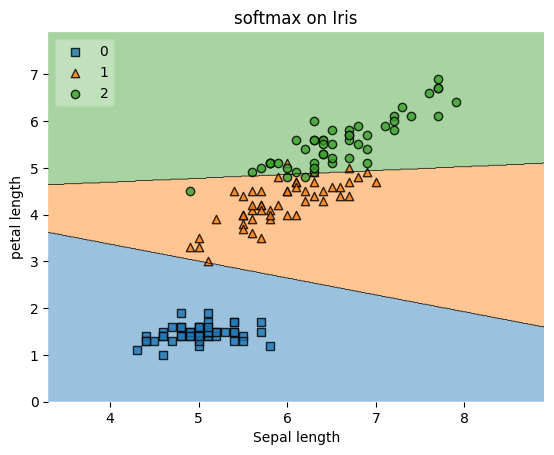

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,clf,legend=2)
plt.xlabel('Sepal length')
plt.ylabel('petal length')
plt.title('softmax on Iris')
plt.show()